Following this tutorial
https://docs.fast.ai/tutorial.vision.html

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)

In [2]:
path.ls()

(#2) [Path('/home/alprielse/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/alprielse/.fastai/data/oxford-iiit-pet/images')]

In [3]:
files = get_image_files(path/"images")
len(files)

7390

In [7]:
files[0], files[6]

(Path('/home/alprielse/.fastai/data/oxford-iiit-pet/images/Birman_115.jpg'),
 Path('/home/alprielse/.fastai/data/oxford-iiit-pet/images/japanese_chin_32.jpg'))

In [9]:
def label_func(f):
  return f[0].isupper()

In [10]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

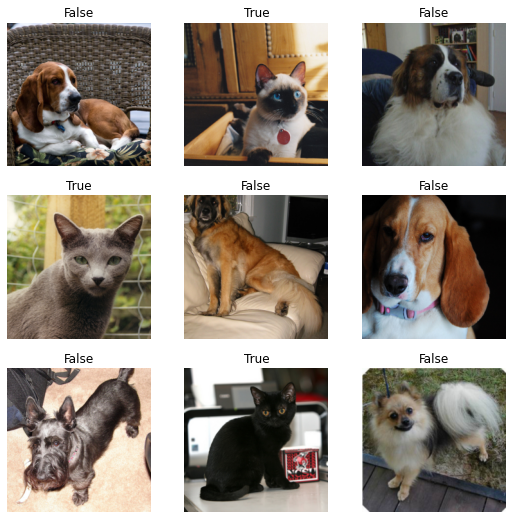

In [13]:
dls.show_batch()

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [16]:
learn.predict(files[0])

('True', TensorBase(1), TensorBase([5.3245e-12, 1.0000e+00]))

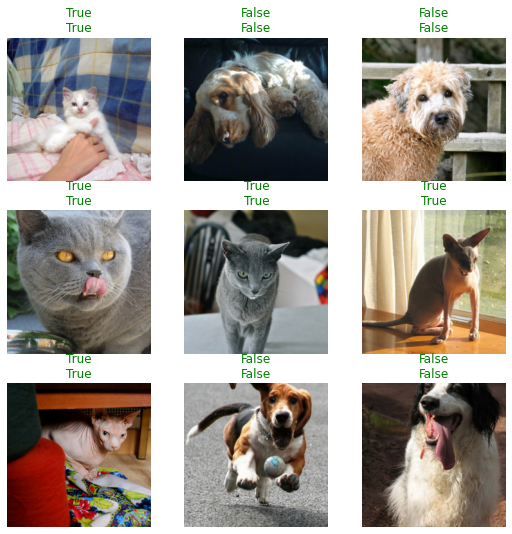

In [17]:
learn.show_results()

In [18]:
files[0].name

'Birman_115.jpg'

In [19]:
pat = r'^(.*)_\d+.jpg'

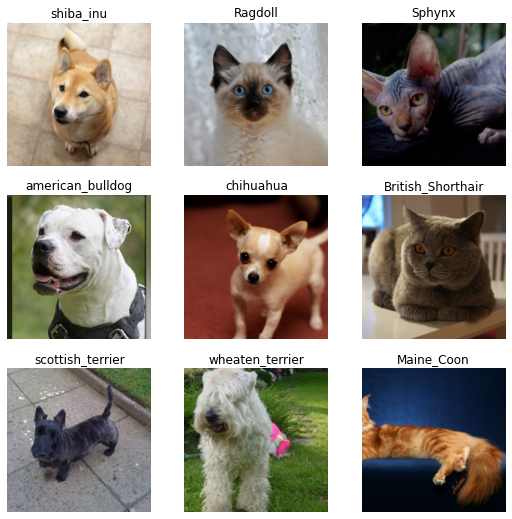

In [23]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))
dls.show_batch()

In [25]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

/home/alprielse/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


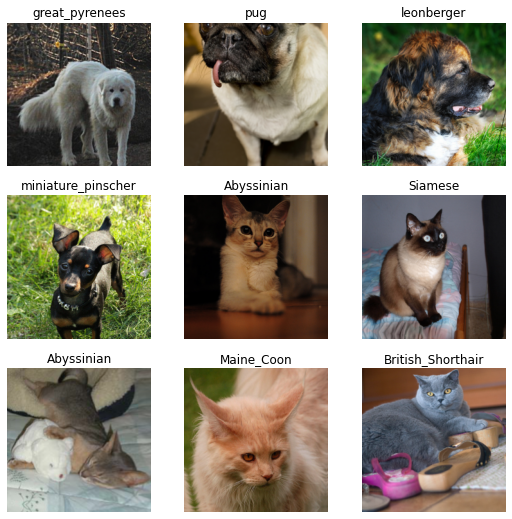

In [26]:
dls.show_batch()

SuggestedLRs(valley=0.0006918309954926372)

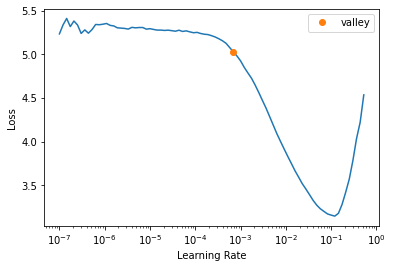

In [30]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [31]:
learn.fine_tune(2, 0.0006918309954926372)

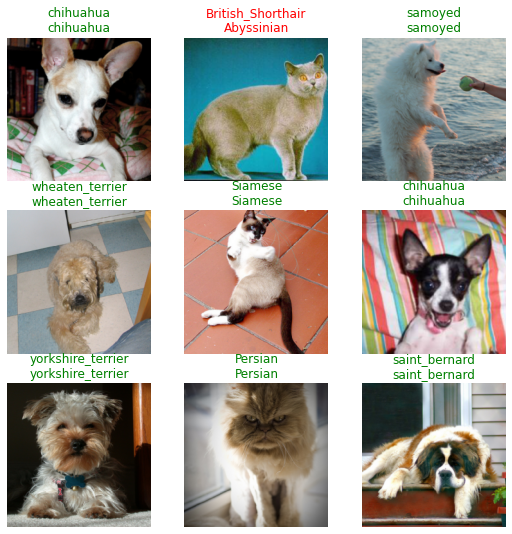

In [32]:
learn.show_results()

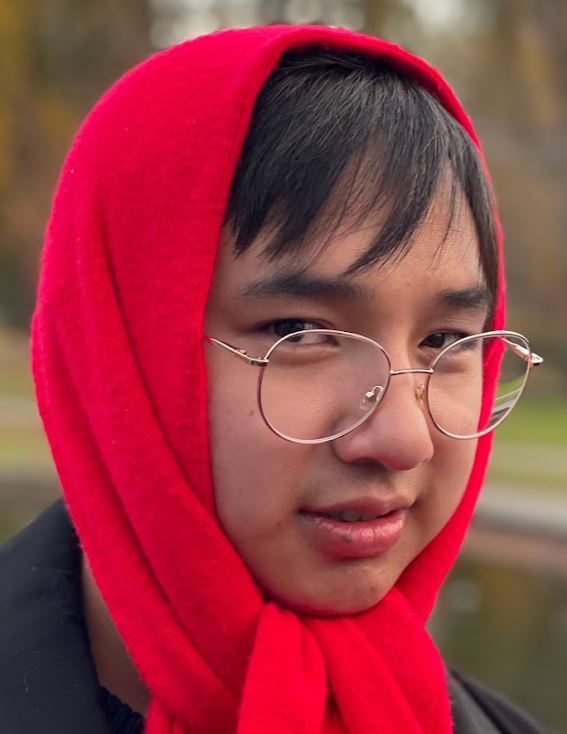

In [35]:
img_bytes = open_file("Dylan.JPG", 'rb').read()
img = PILImage.create(img_bytes)
img

In [36]:
learn.predict(img)

('Sphynx',
 TensorBase(11),
 TensorBase([0.0077, 0.0483, 0.0136, 0.0455, 0.0149, 0.0117, 0.0137, 0.0294, 0.0865,
         0.0192, 0.0030, 0.1954, 0.0301, 0.0025, 0.0416, 0.0548, 0.0103, 0.0056,
         0.0262, 0.0103, 0.0221, 0.0297, 0.0116, 0.0494, 0.0092, 0.0169, 0.0081,
         0.0174, 0.0277, 0.0171, 0.0549, 0.0024, 0.0049, 0.0381, 0.0005, 0.0042,
         0.0153]))

In [37]:
interp = Interpretation.from_learner(learn)

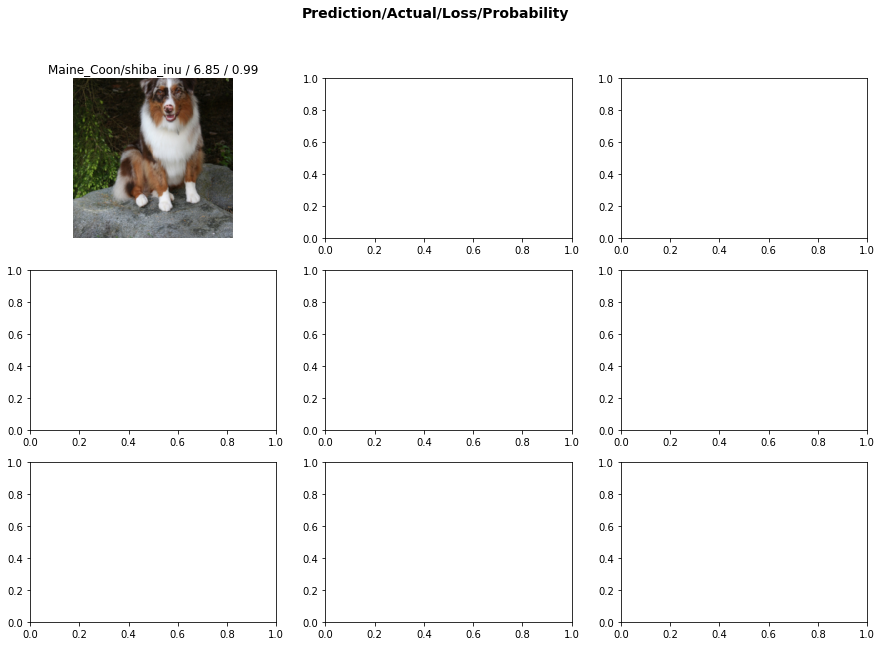

In [39]:
interp.plot_top_losses(9, figsize=(15,10))

# Single-label classification - With the data block API

In [44]:
pets = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(),
  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
  item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=224)
)

In [45]:
dls = pets.dataloaders(untar_data(URLs.PETS)/'images')

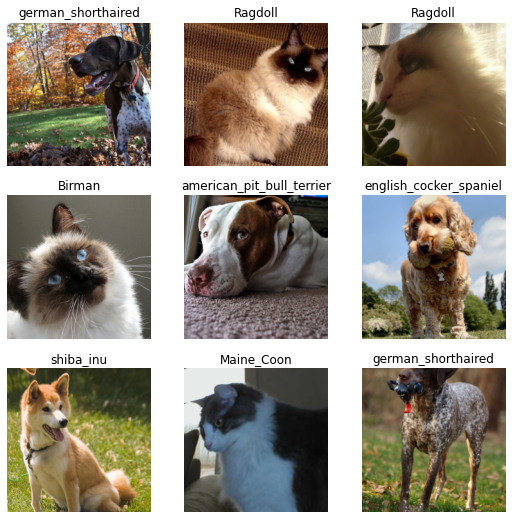

In [47]:
dls.show_batch(max_n=9)

# Multi-label classification

In [3]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#9) [Path('/home/alprielse/.fastai/data/pascal_2007/segmentation'),Path('/home/alprielse/.fastai/data/pascal_2007/test.json'),Path('/home/alprielse/.fastai/data/pascal_2007/train.json'),Path('/home/alprielse/.fastai/data/pascal_2007/valid.json'),Path('/home/alprielse/.fastai/data/pascal_2007/test.csv'),Path('/home/alprielse/.fastai/data/pascal_2007/models'),Path('/home/alprielse/.fastai/data/pascal_2007/test'),Path('/home/alprielse/.fastai/data/pascal_2007/train.csv'),Path('/home/alprielse/.fastai/data/pascal_2007/train')]

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

## Multi-label classification - Using the high-level API

In [5]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
  item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

/home/alprielse/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


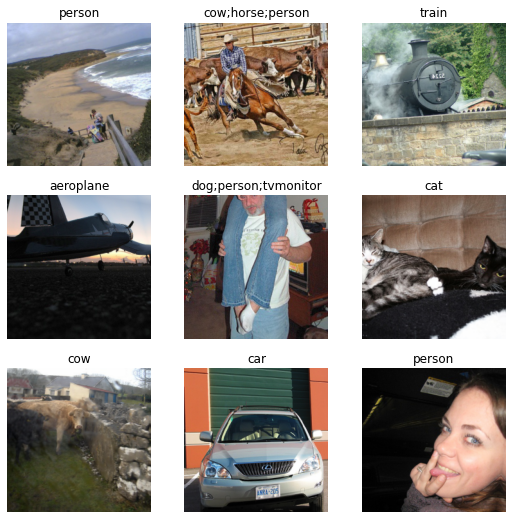

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(valley=0.0012022644514217973)

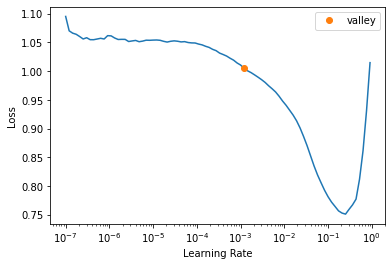

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(10, 1e-3)

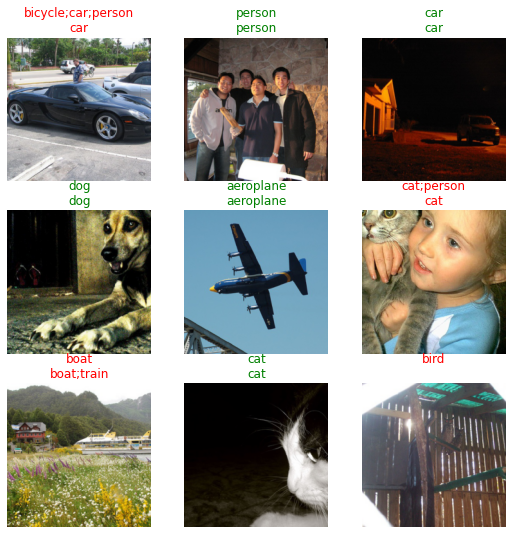

In [10]:
learn.show_results()

In [11]:
learn.predict(path/'train/000005.jpg')

((#2) ['chair','diningtable'],
 TensorBase([False, False, False, False, False, False, False, False,  True, False,
          True, False, False, False, False, False, False, False, False, False]),
 TensorBase([0.0527, 0.0849, 0.0359, 0.0734, 0.2867, 0.1089, 0.0250, 0.0264, 0.9998,
         0.1341, 0.9338, 0.0392, 0.0877, 0.0841, 0.0868, 0.1652, 0.1153, 0.3040,
         0.0821, 0.1771]))

In [13]:
img = open_file('Caitlin.JPG', 'rb').read()
img = PILImage.create(img)

learn.predict(img)

((#1) ['person'],
 TensorBase([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True, False, False, False, False, False]),
 TensorBase([0.0745, 0.0710, 0.0522, 0.1141, 0.1577, 0.1488, 0.0264, 0.0425, 0.1423,
         0.1097, 0.1406, 0.0709, 0.1484, 0.1691, 0.9809, 0.1554, 0.1058, 0.0800,
         0.1138, 0.1217]))

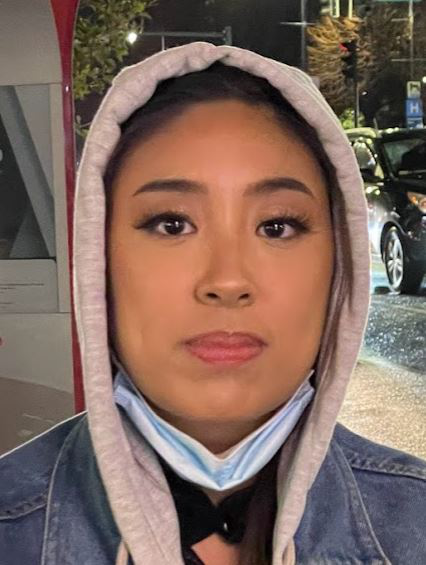

In [14]:
img

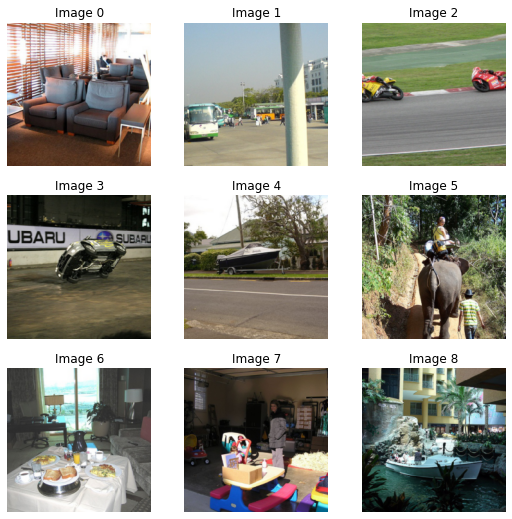

In [16]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

## Multi-label Classification - With the data block API

In [17]:
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [19]:
pascal = DataBlock(
  blocks=(ImageBlock,MultiCategoryBlock),
  splitter=ColSplitter('is_valid'),
  get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
  get_y=ColReader('labels', label_delim=' '),
  item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=224)
)

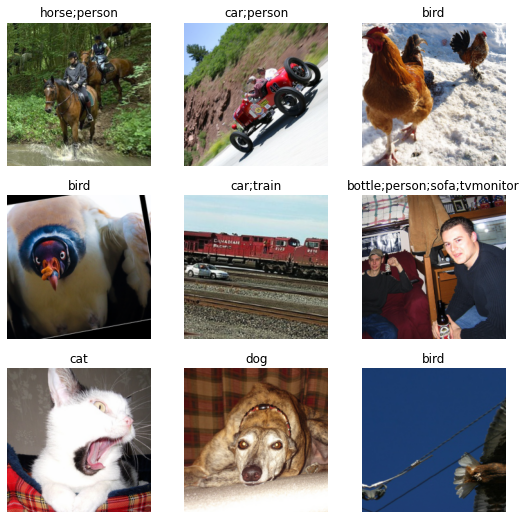

In [21]:
dls = pascal.dataloaders(df)
dls.show_batch(max_n=9)

# Segmentation

In [22]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/home/alprielse/.fastai/data/camvid_tiny/codes.txt'),Path('/home/alprielse/.fastai/data/camvid_tiny/images'),Path('/home/alprielse/.fastai/data/camvid_tiny/labels')]

In [24]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [25]:
fnames = get_image_files(path/'images')
fnames[0]

Path('/home/alprielse/.fastai/data/camvid_tiny/images/0016E5_08155.png')

In [27]:
(path/'labels').ls()[0]

Path('/home/alprielse/.fastai/data/camvid_tiny/labels/0001TP_008670_P.png')

In [28]:
def label_func(fn):
  return path/'labels'/f'{fn.stem}_P{fn.suffix}'

In [29]:
dls = SegmentationDataLoaders.from_label_func(
  path, bs=8, fnames=fnames, label_func=label_func, codes=codes
)

/home/alprielse/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/home/alprielse/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


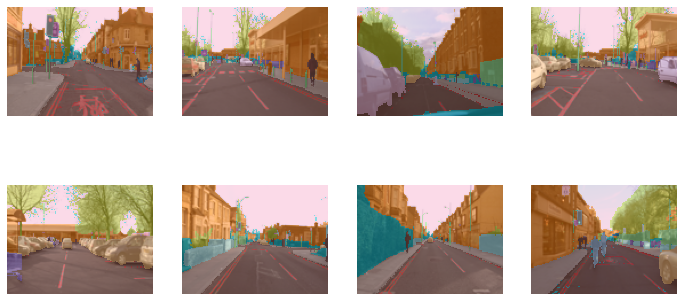

In [30]:
dls.show_batch(max_n=9)

In [35]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

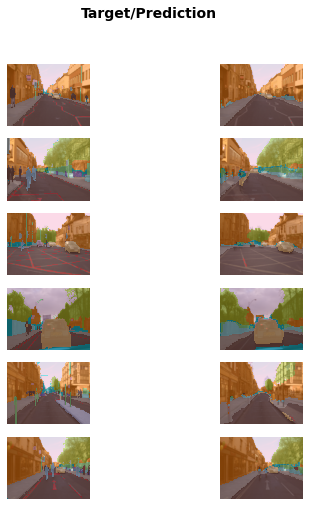

In [36]:
learn.show_results(max_n=6, figsize=(7,8))

/home/alprielse/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


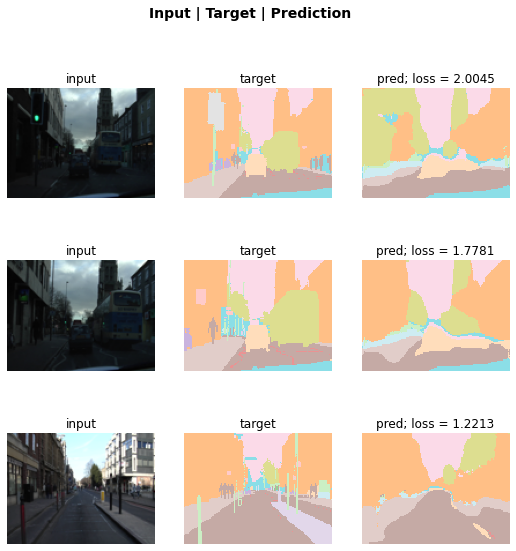

In [37]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(k=3)

# Points
Skipped this section